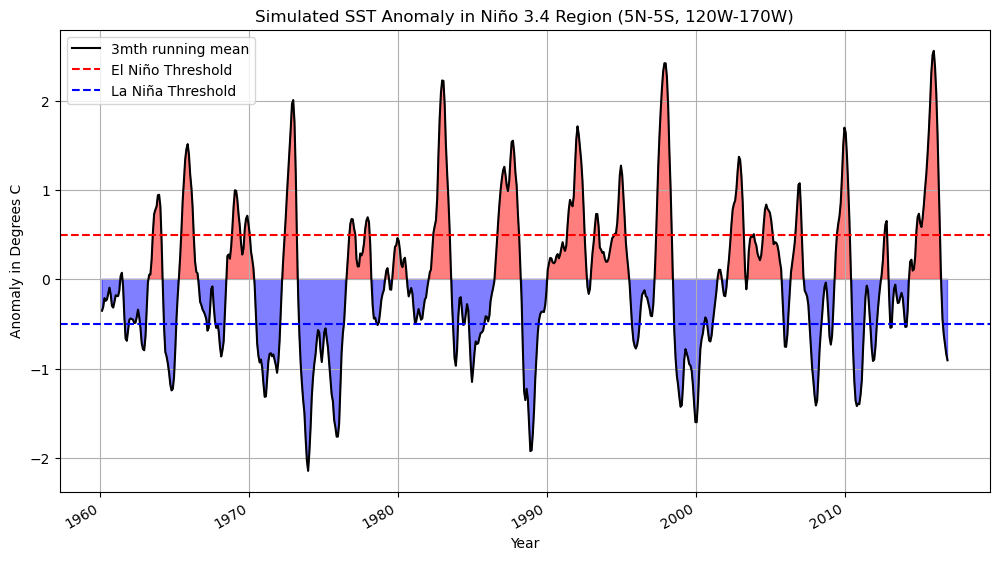

In [2]:
#第一题
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
da = xr.open_dataset("C:\\ese5023\\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
region = dict(lat=slice(-5, 5), lon=slice(190, 240))
nino34_sst = da.sst.sel(**region)
monthly_climatology = nino34_sst.groupby('time.month').mean('time')
sst_anomalies = nino34_sst.groupby('time.month') - monthly_climatology
running_mean_anomalies = sst_anomalies.rolling(time=3, center=True).mean()
nino34_index = running_mean_anomalies.mean(dim=['lat','lon'])
time = nino34_index.time
plt.figure(figsize=(12, 6))
nino34_index.plot(label='3mth running mean', color='black')
plt.fill_between(time, nino34_index, where=(nino34_index > 0), color='red', alpha=0.5)
plt.fill_between(time, nino34_index, where=(nino34_index < 0), color='blue', alpha=0.5)
plt.axhline(0.5, color='red', linestyle='--', label='El Niño Threshold')
plt.axhline(-0.5, color='blue', linestyle='--', label='La Niña Threshold')
plt.title("Simulated SST Anomaly in Niño 3.4 Region (5N-5S, 120W-170W)")
plt.xlabel("Year")
plt.ylabel("Anomaly in Degrees C")
plt.legend()
plt.grid(True)
plt.show()

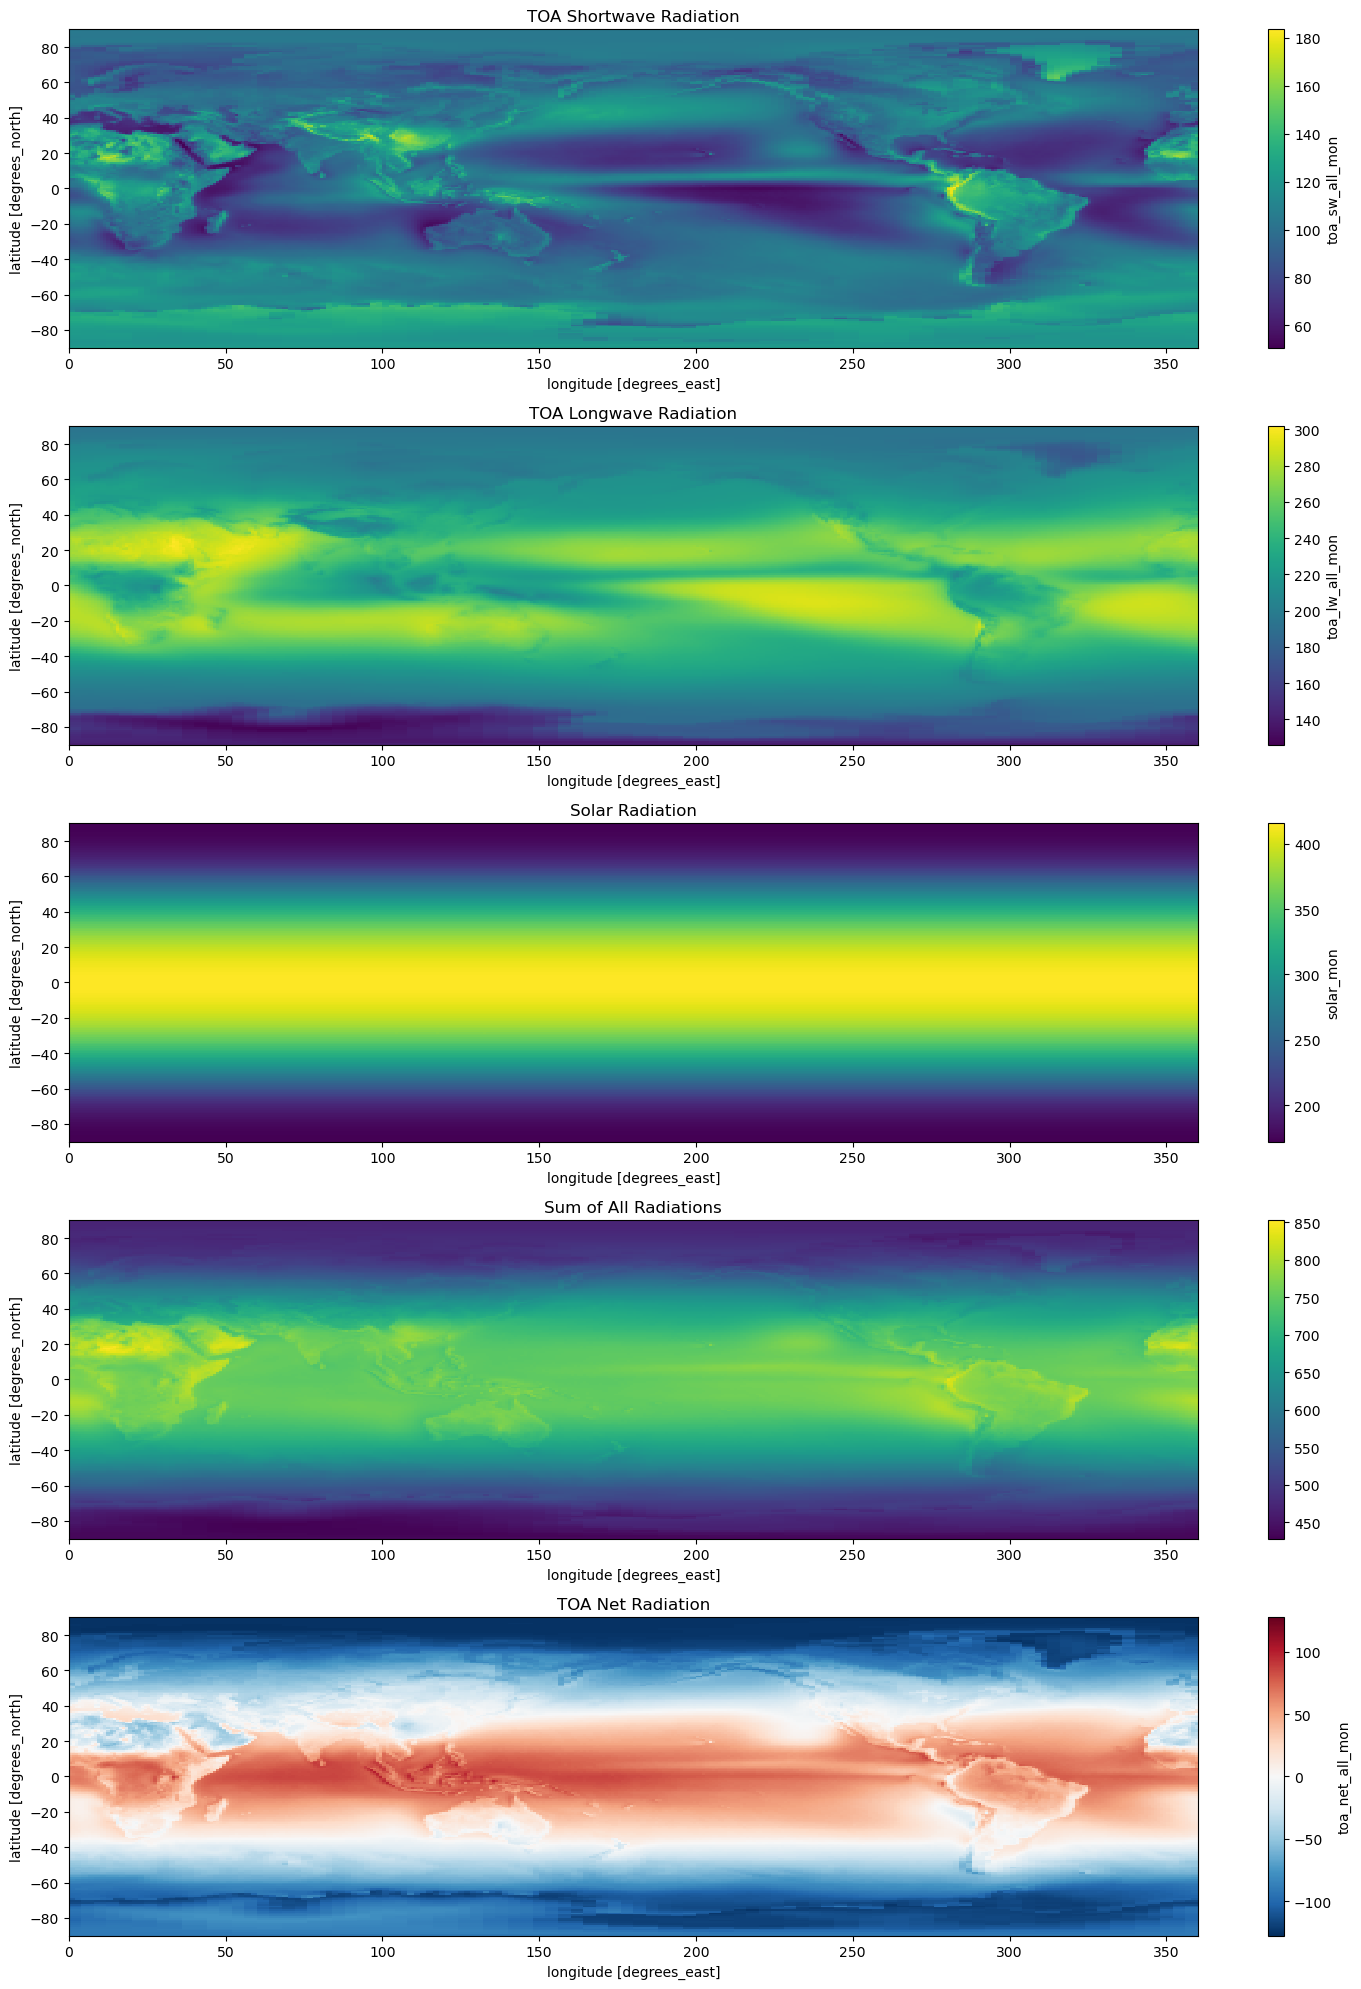

In [48]:
#第二题
#2.1
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

da = xr.open_dataset("C:\\ese5023\\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

fig, axs = plt.subplots(5, 1, figsize=(15, 20))

da1=da['toa_sw_all_mon'].mean(dim='time')
da2=da['toa_lw_all_mon'].mean(dim='time')
da3=da['solar_mon'].mean(dim='time')
da4=da1+da2+da3
da5=da['toa_net_all_mon'].mean(dim='time')

da1.plot(ax=axs[0])
da2.plot(ax=axs[1])
da3.plot(ax=axs[2])
da4.plot(ax=axs[3])
da5.plot(ax=axs[4])

axs[0].set_title('TOA Shortwave Radiation')
axs[1].set_title('TOA Longwave Radiation')
axs[2].set_title('Solar Radiation')
axs[3].set_title('Sum of All Radiations')
axs[4].set_title('TOA Net Radiation')

plt.tight_layout()
plt.show()

In [54]:
#2.2
toa_solar_in = da['solar_mon']
toa_lw_out = da['toa_lw_all_mon']
toa_sw_out = da['toa_sw_all_mon']
earth_radius = 6371 * 1000  
lat = da['lat']
lon = da['lon']
lat_rad = np.deg2rad(lat.values)  

grid_area = 2 * np.pi * earth_radius**2 * np.abs(np.sin(lat_rad[1:]) - np.sin(lat_rad[:-1])) / len(lon)

if len(lat) == len(grid_area) + 1:
    grid_area = np.concatenate([grid_area, [grid_area[-1]]])

grid_area_repeated = np.tile(grid_area, (len(lon), 1)).T

grid_area_xr = xr.DataArray(grid_area_repeated, dims=["lat", "lon"])

avg_toa_solar_in = (da['solar_mon'] * grid_area_xr).mean(dim=["lat", "lon"])
avg_toa_lw_out = (da['toa_lw_all_mon'] * grid_area_xr).mean(dim=["lat", "lon"])
avg_toa_sw_out = (da['toa_sw_all_mon'] * grid_area_xr).mean(dim=["lat", "lon"])

print("Average TOA Incoming Solar:", avg_toa_solar_in.values)
print("Average TOA Outgoing Longwave:", avg_toa_lw_out.values)
print("Average TOA Outgoing Shortwave:", avg_toa_sw_out.values)


Average TOA Incoming Solar: [2.7065875e+12 2.6541312e+12 2.6088880e+12 2.5831169e+12 2.5819291e+12
 2.6067211e+12 2.6491987e+12 2.7035582e+12 2.7515727e+12 2.7810773e+12
 2.7813869e+12 2.7544610e+12 2.7072817e+12 2.6540109e+12 2.6095958e+12
 2.5831426e+12 2.5823087e+12 2.6055415e+12 2.6483402e+12 2.7024262e+12
 2.7504846e+12 2.7805659e+12 2.7821269e+12 2.7551843e+12 2.7089442e+12
 2.6548634e+12 2.6100152e+12 2.5839259e+12 2.5811388e+12 2.6048631e+12
 2.6484007e+12 2.7012529e+12 2.7497453e+12 2.7802602e+12 2.7810933e+12
 2.7544757e+12 2.7075787e+12 2.6545034e+12 2.6094697e+12 2.5827329e+12
 2.5810038e+12 2.6046193e+12 2.6477695e+12 2.6986010e+12 2.7487922e+12
 2.7790205e+12 2.7798539e+12 2.7528415e+12 2.7060952e+12 2.6531736e+12
 2.6081543e+12 2.5821016e+12 2.5803251e+12 2.6046025e+12 2.6484985e+12
 2.7014741e+12 2.7496759e+12 2.7791888e+12 2.7787495e+12 2.7521235e+12
 2.7060624e+12 2.6529998e+12 2.6080240e+12 2.5819483e+12 2.5805862e+12
 2.6045676e+12 2.6474992e+12 2.7007294e+12 2.7488

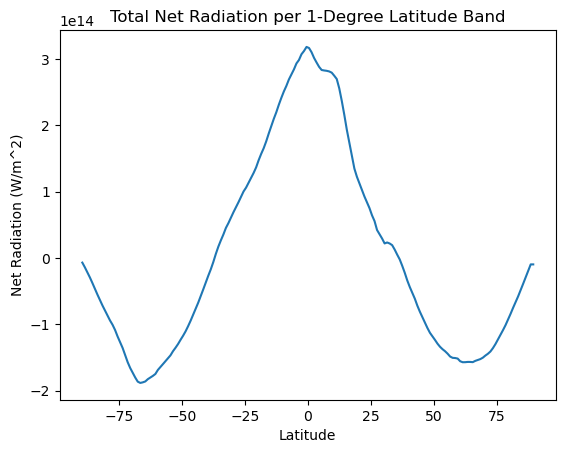

In [55]:
#2.3
net_radiation = da['solar_mon'] - (da['toa_lw_all_mon'] + da['toa_sw_all_mon'])
earth_radius = 6371 * 1000
lat = da['lat']
lon = da['lon']
lat_rad = np.deg2rad(lat.values)
delta_lat = np.abs(lat_rad[1:] - lat_rad[:-1])  
grid_area = 2 * np.pi * earth_radius**2 * np.abs(np.sin(lat_rad[1:]) - np.sin(lat_rad[:-1])) / len(lon)
if len(lat) == len(grid_area) + 1:
    grid_area = np.concatenate([grid_area, [grid_area[-1]]])
grid_area_repeated = np.tile(grid_area, (len(lon), 1)).T
grid_area_xr = xr.DataArray(grid_area_repeated, dims=["lat", "lon"])
net_radiation_area_weighted = net_radiation * grid_area_xr
net_radiation_lat_band = net_radiation_area_weighted.sum(dim='lon')

net_radiation_lat_band.mean(dim='time').plot()
plt.title('Total Net Radiation per 1-Degree Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (W/m^2)')
plt.show()


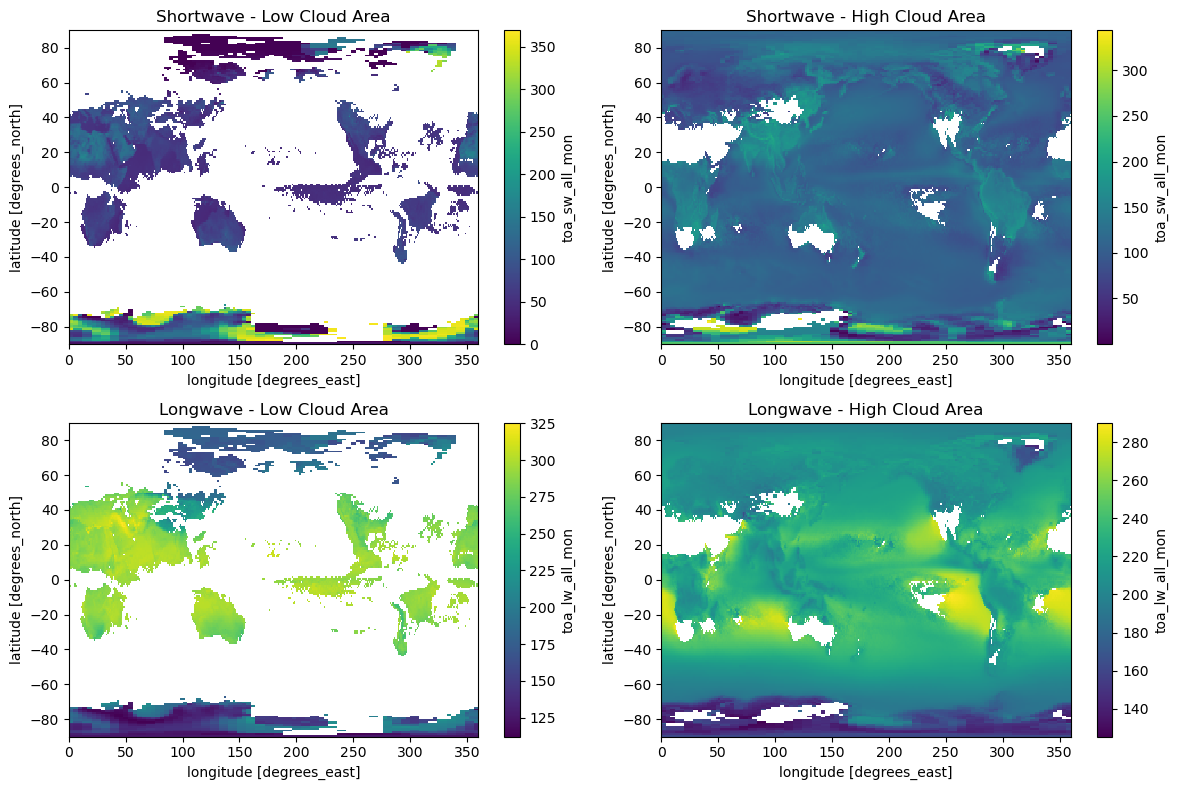

In [56]:
#2.4
cloud_cover = da['cldarea_total_daynight_mon']  
toa_sw_out = da['toa_sw_all_mon']  
toa_lw_out = da['toa_lw_all_mon'] 
low_cloud = cloud_cover <= 25
high_cloud = cloud_cover >= 75

sw_low_cloud_mean = toa_sw_out.where(low_cloud).mean(dim='time')
sw_high_cloud_mean = toa_sw_out.where(high_cloud).mean(dim='time')
lw_low_cloud_mean = toa_lw_out.where(low_cloud).mean(dim='time')
lw_high_cloud_mean = toa_lw_out.where(high_cloud).mean(dim='time')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sw_low_cloud_mean.plot(ax=axs[0, 0])
axs[0, 0].set_title('Shortwave - Low Cloud Area')

sw_high_cloud_mean.plot(ax=axs[0, 1])
axs[0, 1].set_title('Shortwave - High Cloud Area')

lw_low_cloud_mean.plot(ax=axs[1, 0])
axs[1, 0].set_title('Longwave - Low Cloud Area')

lw_high_cloud_mean.plot(ax=axs[1, 1])
axs[1, 1].set_title('Longwave - High Cloud Area')

plt.tight_layout()
plt.show()


In [57]:
#2.5
cloud_cover = da['cldarea_total_daynight_mon']
toa_sw_out = da['toa_sw_all_mon'] 
toa_lw_out = da['toa_lw_all_mon'] 

low_cloud = cloud_cover <= 25
high_cloud = cloud_cover >= 75

global_mean_sw_low_cloud = toa_sw_out.where(low_cloud).mean()
global_mean_sw_high_cloud = toa_sw_out.where(high_cloud).mean()
global_mean_lw_low_cloud = toa_lw_out.where(low_cloud).mean()
global_mean_lw_high_cloud = toa_lw_out.where(high_cloud).mean()

print("Global Mean Shortwave Radiation - Low Cloud Area:", global_mean_sw_low_cloud.values)
print("Global Mean Shortwave Radiation - High Cloud Area:", global_mean_sw_high_cloud.values)
print("Global Mean Longwave Radiation - Low Cloud Area:", global_mean_lw_low_cloud.values)
print("Global Mean Longwave Radiation - High Cloud Area:", global_mean_lw_high_cloud.values)


Global Mean Shortwave Radiation - Low Cloud Area: 97.11116
Global Mean Shortwave Radiation - High Cloud Area: 111.76594
Global Mean Longwave Radiation - Low Cloud Area: 247.33109
Global Mean Longwave Radiation - High Cloud Area: 215.39049


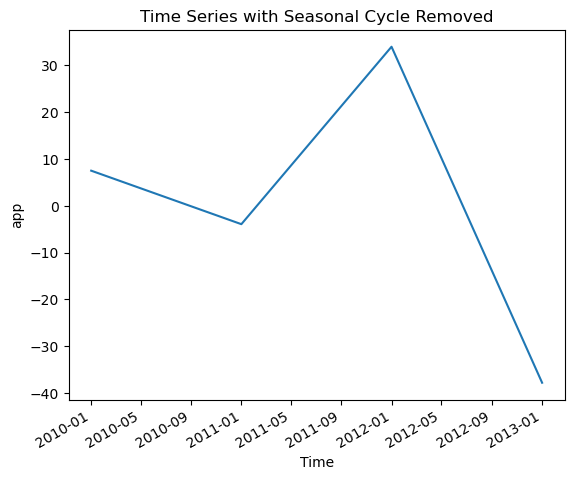

In [18]:
#第三题
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
da = xr.open_dataset("C:\\ese5023\\CMS_Lake_Superior_PP_Yearly_2010-2013.nc", engine="netcdf4",drop_variables="time_bounds")
monthly_mean = da['app'].groupby('time.month').mean()
app_deseasonalized = da['app'].groupby('time.month') - monthly_mean
app_index = app_deseasonalized.mean(dim=['latitude','longitude'])
app_index.plot()
plt.title('Time Series with Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('app')
plt.show()

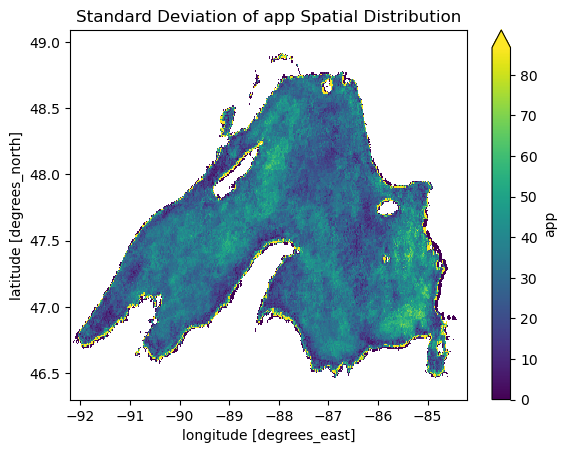

In [47]:
#经纬度标准差热图
da['app'].std(dim='time').plot(x='longitude', y='latitude', robust=True)
plt.title('Standard Deviation of app Spatial Distribution')
plt.show()

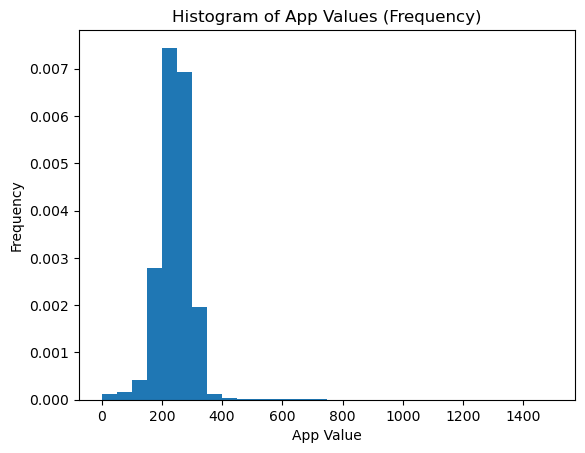

In [38]:
#直方图
app = da['app']
app_flat = app.values.flatten()
plt.hist(app_flat, bins=30, density=True)
plt.title('Histogram of App Values (Frequency)')
plt.xlabel('App Value')
plt.ylabel('Frequency')
plt.show()

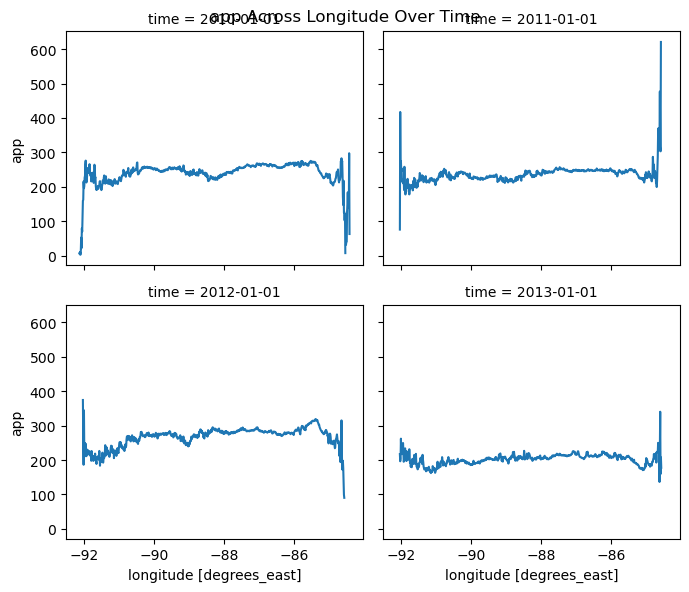

In [44]:
#经度-时间图：
app.mean(dim='latitude').plot(x='longitude', col='time', col_wrap=2)
plt.suptitle('app Across Longitude Over Time')
plt.show()

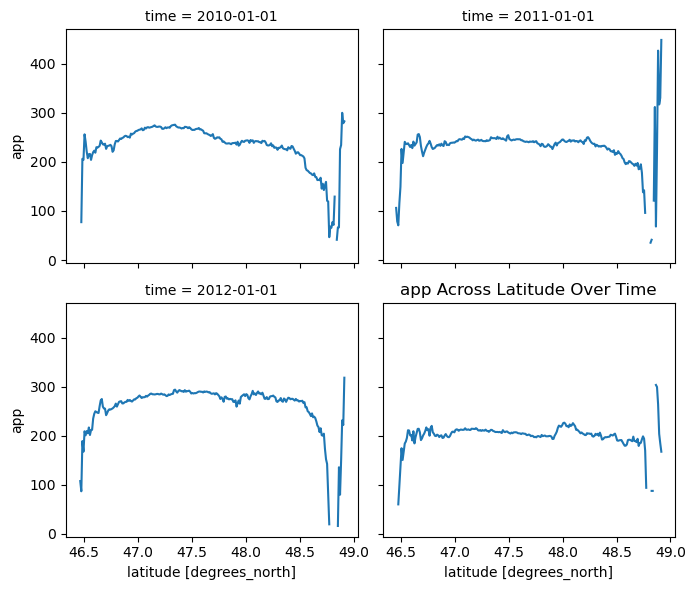

In [43]:
#纬度-时间图
app.mean(dim='longitude').plot(x='latitude', col='time', col_wrap=2)
plt.title('app Across Latitude Over Time')
plt.show()

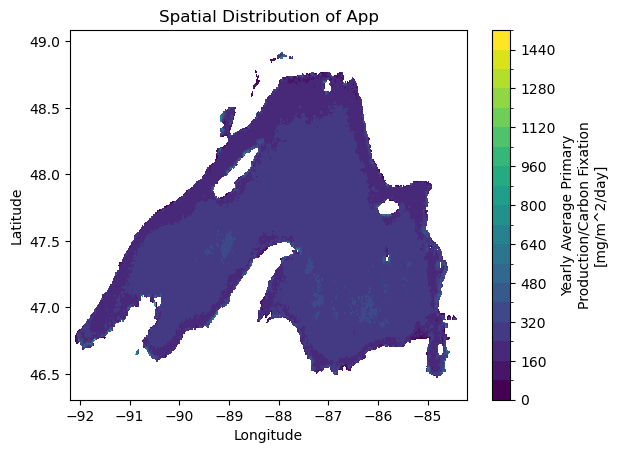

In [34]:
#经纬度热图
app.isel(time=0).plot.contourf(x='longitude', y='latitude', levels=20)
plt.title('Spatial Distribution of App')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()